In [4]:

from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os



model_filename='emotion_model_v6.keras'
image_path = 'data/'  # Base folder path for dataset

folder_path = os.path.join(image_path, "images")
print("Images folder:", folder_path)
print("Files in images:", os.listdir(folder_path))


Images folder: data/images
Files in images: ['test', 'train', 'validation']


In [ ]:

# =======================================================================
# Configuration Parameters
# =======================================================================

picture_size = 48  # Input image size (48x48 grayscale)
batch_size = 128   # Increased batch size for Snapdragon X Elite with 32GB RAM
epochs = 48        # Number of training epochs
no_of_classes = 7  # Number of emotion classes (Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise)
learning_rate = 0.0001  # Initial learning rate for Adam optimizer

# =======================================================================
# Data Augmentation and Loading
# =======================================================================

# Training data generator with augmentation for better generalization
datagen_train = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=15,            # Random rotation up to 15 degrees
    width_shift_range=0.1,        # Random horizontal shift (10% of width)
    height_shift_range=0.1,       # Random vertical shift (10% of height)
    zoom_range=0.1,               # Random zoom (10%)
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest',           # Fill strategy for new pixels
    validation_split=0.2          # Reserve 20% of training data for validation
)

# Validation data generator (no augmentation, only rescaling)
datagen_validation = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training set (80%)
train_set = datagen.flow_from_directory(
    folder_path + "train/",  # Use train folder only
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Specify training subset
)

# Validation set (20%)
validation_set = datagen.flow_from_directory(
    folder_path + "train/",  # Same folder
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # Specify validation subset
)


print(f"Validation samples: {validation_set.n}")
print(f"Class indices: {validation_set.class_indices}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step

Classification Report:
              precision    recall  f1-score   support

       Angry       1.00      0.04      0.08       128
     Disgust       0.00      0.00      0.00         0
        Fear       0.00      0.00      0.00         0
       Happy       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
         Sad       0.00      0.00      0.00         0
    Surprise       0.00      0.00      0.00         0

    accuracy                           0.04       128
   macro avg       0.14      0.01      0.01       128
weighted avg       1.00      0.04      0.08       128

Accuracy =  0.0390625


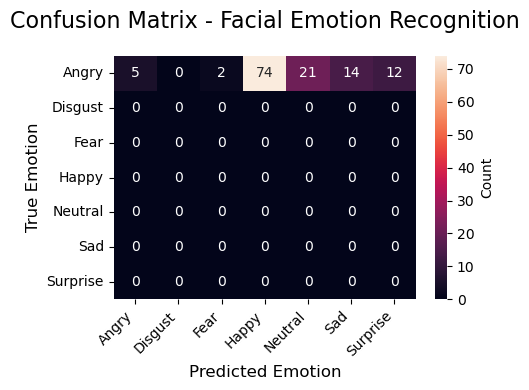


Classification Report:


ValueError: Number of classes, 6, does not match size of target_names, 7. Try specifying the labels parameter

In [3]:


class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Test the model
my_model = load_model(model_filename, compile=False)

#Generate a batch of images
test_img, test_lbl = validation_set.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(test_labels, predictions,
                           target_names=class_labels,
                           labels=list(range(7)),  # Force all 7 classes
                           zero_division=0))  # Handle missing class gracefully

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions, labels=list(range(7)))
#print(cm)
import seaborn as sns
#sns.heatmap(cm, annot=True)

# Plot confusion matrix with labels
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', 
            xticklabels=class_labels, 
            yticklabels=class_labels,
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Facial Emotion Recognition', fontsize=16, pad=20)
plt.xlabel('Predicted Emotion', fontsize=12)
plt.ylabel('True Emotion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Print classification report for detailed metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(test_labels, predictions, target_names=class_labels))

In [4]:
# Test on ALL validation data
predictions = []
test_labels = []

for i in range(len(validation_set)):
    test_img, test_lbl = validation_set[i]
    preds = my_model.predict(test_img, verbose=0)
    predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(np.argmax(test_lbl, axis=1))

predictions = np.array(predictions)
test_labels = np.array(test_labels)

In [6]:
print(predictions)
print(test_labels)

[3 3 3 ... 6 4 6]
[0 0 0 ... 6 6 6]


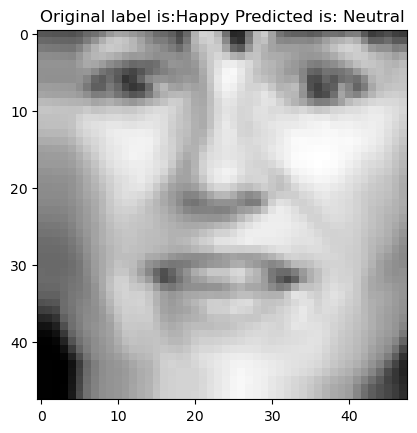

In [ ]:
import random
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()